In [1]:
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns

Obtain data and related stuff

In [2]:
train_X = [s.strip() for s in open('../crawler/data/tweet_en_all.txt.text')]
train_Y = [l.strip() for l in open('../crawler/data/tweet_en_all.txt.labels')]
print len(train_X), len(train_Y)

484384 484384


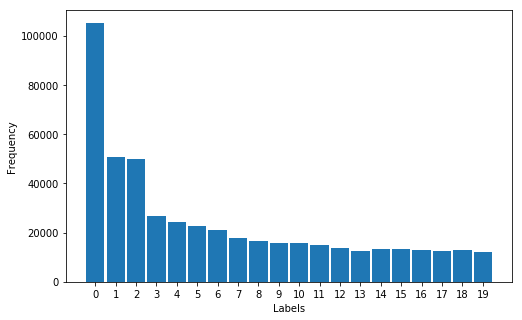

In [3]:
label_freq = list(dict(Counter(map(int, train_Y))).items())
bins, hist = np.array([w[0] for w in label_freq]), np.array([w[1] for w in label_freq])

width = 0.9 * (bins[1] - bins[0])
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(bins, hist, align='center', width=width)
ax.set_xticks(bins)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

# Labels:

In [4]:
mapping = [w.strip().split() for w in open('../../../mapping/us_mapping.txt')]
mdict = {}

for m in mapping:
    mdict[int(m[0])] = m[1]
    print m[0], '\t:\t', m[1], '\t', m[2]
    

0 	:	❤ 	_red_heart_
1 	:	😍 	_smiling_face_with_hearteyes_
2 	:	😂 	_face_with_tears_of_joy_
3 	:	💕 	_two_hearts_
4 	:	🔥 	_fire_
5 	:	😊 	_smiling_face_with_smiling_eyes_
6 	:	😎 	_smiling_face_with_sunglasses_
7 	:	✨ 	_sparkles_
8 	:	💙 	_blue_heart_
9 	:	😘 	_face_blowing_a_kiss_
10 	:	📷 	_camera_
11 	:	🇺🇸 	_United_States_
12 	:	☀ 	_sun_
13 	:	💜 	_purple_heart_
14 	:	😉 	_winking_face_
15 	:	💯 	_hundred_points_
16 	:	😁 	_beaming_face_with_smiling_eyes_
17 	:	🎄 	_Christmas_tree_
18 	:	📸 	_camera_with_flash_
19 	:	😜 	_winking_face_with_tongue_


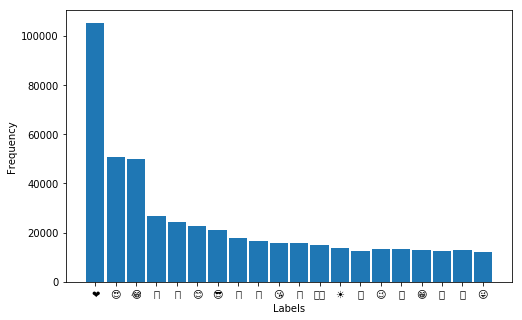

In [5]:
label_freq = list(dict(Counter(map(int, train_Y))).items())
bins, hist = np.array([w[0] for w in label_freq]), np.array([w[1] for w in label_freq])

width = 0.9 * (bins[1] - bins[0])
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(bins, hist, align='center', width=width)
bbins = [mdict[b].decode('utf-8') for b in bins]
ax.set_xticks(bins)
ax.set_xticklabels(bbins)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

Extract baseline features

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
hashvectorizer = HashingVectorizer(encoding='utf-8', decode_error='ignore',
                                  strip_accents='unicode', analyzer='word',
                                  lowercase=True).fit(train_X)
X_hv_train = hashvectorizer.transform(train_X)

In [15]:
countvectorizer = CountVectorizer(encoding='utf-8', decode_error='ignore',
                                  strip_accents='unicode', analyzer='word',
                                  lowercase=True).fit(train_X)
X_cv_train = countvectorizer.transform(train_X)

In [17]:
tfidfvectorizer = TfidfVectorizer(encoding='utf-8', decode_error='ignore',
                                  strip_accents='unicode', analyzer='word',
                                  lowercase=True).fit(train_X)
X_tf_train = tfidfvectorizer.transform(train_X)

In [18]:
X_cv_train.shape, X_tf_train.shape, X_hv_train.shape

((484384, 292961), (484384, 292961), (484384, 1048576))

Baseline classifiers

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
import sklearn.metrics as skm

In [30]:
#clf_rf = RandomForestClassifier(n_estimators=1000,verbose=True)
#clf_rf.fit(X_cv_train, train_Y)

In [31]:
# clf_lr = LogisticRegressionCV(fit_intercept=True, verbose=True)
# clf_lr.fit(X_cv_train, train_Y)

In [33]:
clf_sgd = SGDClassifier(loss='hinge', penalty='elasticnet',
                        alpha=0.0001, verbose=8, class_weight='balanced')
clf_sgd.fit(X_cv_train, train_Y)

-- Epoch 1
Norm: 12.90, NNZs: 974, Bias: -1.000521, T: 484384, Avg. loss: 0.493241
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 9.38, NNZs: 68, Bias: -1.000310, T: 968768, Avg. loss: 0.434769
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 7.74, NNZs: 76, Bias: -1.000012, T: 1453152, Avg. loss: 0.434477
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 6.74, NNZs: 74, Bias: -1.000014, T: 1937536, Avg. loss: 0.434363
Total training time: 1.06 seconds.
-- Epoch 5
Norm: 6.06, NNZs: 76, Bias: -1.000012, T: 2421920, Avg. loss: 0.434285
Total training time: 1.35 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


Norm: 13.99, NNZs: 1023, Bias: -1.000510, T: 484384, Avg. loss: 0.248172
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 10.19, NNZs: 87, Bias: -1.000005, T: 968768, Avg. loss: 0.210224
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 8.42, NNZs: 93, Bias: -1.000020, T: 1453152, Avg. loss: 0.209987
Total training time: 0.80 seconds.
-- Epoch 4
Norm: 7.33, NNZs: 90, Bias: -1.000022, T: 1937536, Avg. loss: 0.209910
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 6.58, NNZs: 78, Bias: -1.000020, T: 2421920, Avg. loss: 0.209863
Total training time: 1.44 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


Norm: 16.52, NNZs: 1455, Bias: -1.015784, T: 484384, Avg. loss: 0.102625
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 12.49, NNZs: 259, Bias: -1.003280, T: 968768, Avg. loss: 0.066716
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 10.46, NNZs: 260, Bias: -1.000444, T: 1453152, Avg. loss: 0.066105
Total training time: 0.81 seconds.
-- Epoch 4
Norm: 9.19, NNZs: 266, Bias: -1.001067, T: 1937536, Avg. loss: 0.065844
Total training time: 1.12 seconds.
-- Epoch 5
Norm: 8.30, NNZs: 306, Bias: -1.001263, T: 2421920, Avg. loss: 0.065719
Total training time: 1.42 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s remaining:    0.0s


Norm: 16.72, NNZs: 1140, Bias: -1.052155, T: 484384, Avg. loss: 0.074290
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 13.79, NNZs: 503, Bias: -1.007011, T: 968768, Avg. loss: 0.052620
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 12.50, NNZs: 536, Bias: -1.005105, T: 1453152, Avg. loss: 0.052023
Total training time: 0.82 seconds.
-- Epoch 4
Norm: 11.77, NNZs: 506, Bias: -1.002794, T: 1937536, Avg. loss: 0.051794
Total training time: 1.11 seconds.
-- Epoch 5
Norm: 11.27, NNZs: 567, Bias: -1.004656, T: 2421920, Avg. loss: 0.051725
Total training time: 1.41 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.7s remaining:    0.0s


Norm: 15.65, NNZs: 1101, Bias: -1.183425, T: 484384, Avg. loss: 0.085818
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 12.08, NNZs: 428, Bias: -1.026392, T: 968768, Avg. loss: 0.057563
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 10.38, NNZs: 396, Bias: -1.012315, T: 1453152, Avg. loss: 0.056352
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 9.39, NNZs: 423, Bias: -1.010102, T: 1937536, Avg. loss: 0.056001
Total training time: 1.21 seconds.
-- Epoch 5
Norm: 8.65, NNZs: 422, Bias: -1.008111, T: 2421920, Avg. loss: 0.055860
Total training time: 1.50 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.2s remaining:    0.0s


Norm: 18.71, NNZs: 937, Bias: -1.000064, T: 484384, Avg. loss: 0.083879
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 14.14, NNZs: 127, Bias: -1.000136, T: 968768, Avg. loss: 0.052250
Total training time: 0.55 seconds.
-- Epoch 3
Norm: 11.89, NNZs: 155, Bias: -1.000252, T: 1453152, Avg. loss: 0.052072
Total training time: 0.83 seconds.
-- Epoch 4
Norm: 10.52, NNZs: 153, Bias: -1.000043, T: 1937536, Avg. loss: 0.051951
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 9.56, NNZs: 145, Bias: -0.999994, T: 2421920, Avg. loss: 0.051897
Total training time: 1.30 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.5s remaining:    0.0s


Norm: 18.89, NNZs: 958, Bias: -1.001896, T: 484384, Avg. loss: 0.090746
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 14.30, NNZs: 97, Bias: -1.000054, T: 968768, Avg. loss: 0.055114
Total training time: 0.60 seconds.
-- Epoch 3
Norm: 11.96, NNZs: 106, Bias: -1.000044, T: 1453152, Avg. loss: 0.054833
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 10.50, NNZs: 95, Bias: -1.000121, T: 1937536, Avg. loss: 0.054728
Total training time: 1.22 seconds.
-- Epoch 5
Norm: 9.47, NNZs: 110, Bias: -1.000078, T: 2421920, Avg. loss: 0.054665
Total training time: 1.52 seconds.
-- Epoch 1


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.0s remaining:    0.0s


Norm: 18.44, NNZs: 1147, Bias: -1.000783, T: 484384, Avg. loss: 0.079769
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 13.84, NNZs: 301, Bias: -1.000232, T: 968768, Avg. loss: 0.054894
Total training time: 0.56 seconds.
-- Epoch 3
Norm: 11.65, NNZs: 328, Bias: -1.000105, T: 1453152, Avg. loss: 0.054477
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 10.31, NNZs: 343, Bias: -1.000112, T: 1937536, Avg. loss: 0.054296
Total training time: 1.03 seconds.
-- Epoch 5
Norm: 9.39, NNZs: 358, Bias: -1.000458, T: 2421920, Avg. loss: 0.054192
Total training time: 1.25 seconds.
-- Epoch 1
Norm: 18.76, NNZs: 902, Bias: -1.000508, T: 484384, Avg. loss: 0.088022
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 14.09, NNZs: 97, Bias: -1.000297, T: 968768, Avg. loss: 0.053577
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 11.77, NNZs: 109, Bias: -1.000725, T: 1453152, Avg. loss: 0.053341
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 10.31, NNZs: 114, Bias: -1.000001, T: 1937536, 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   27.2s finished


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=8, warm_start=False)

In [35]:
skm.accuracy_score(train_Y, clf_sgd.predict(X_cv_train))

0.15733797978463368

In [ ]:
clf_svm = SVC(class_weight='balanced', verbose=True, random_state=123)
clf_svm.fit(X_cv_train, train_Y)
skm.accuracy_score(train_Y, clf_svm.predict(X_cv_train))

[LibSVM]